<a href="https://colab.research.google.com/github/soniabara/Global-CO2-Emission-Forecast-Time-series-/blob/main/co2emmision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("wide_format_co2_emission_dataset.csv")
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())



Dataset shape: (199, 29)

First few rows:
               Country 1990 1991 1992 1993 1994  1995 1996 1997 1998  ...  \
0          Afghanistan  0.2  0.2  0.1  0.1  0.1   0.1  0.1  0.1  0.1  ...   
1              Albania  2.3  1.2  0.7  0.7  0.6   0.7  0.6  0.5  0.6  ...   
2              Algeria    3    3    3    3    3   3.3  3.3    3  3.5  ...   
3               Angola  0.4  0.4  0.4  0.5  0.3   0.9  0.8  0.6  0.5  ...   
4  Antigua and Barbuda  4.9  4.7  4.6  4.8  4.7   4.7  4.6  4.7  4.5  ...   

  2008  2009  2010  2011  2012  2013  2014  2015  2018   2021  
0  0.2   0.2   0.3   0.4   0.4   0.3   0.3   0.3   0.3   8.35  
1  1.6   1.5   1.5   1.6   1.7   1.7     2   1.6   1.6   4.59  
2  3.2   3.4   3.3   3.3   3.5   3.5   3.7   3.9   3.9    173  
3  1.4   1.4   1.4   1.4   1.3   1.3   1.3   1.2   1.0  24.45  
4  5.2   5.9     6   5.8   5.4   5.4   5.4   6.2   6.2   0.78  

[5 rows x 29 columns]


In [ ]:
m_data=df.melt(id_vars='Country',value_vars=df.columns[1:],var_name='Year',value_name='CO2EmissionRate')
m_data.head()

,Country,Year,CO2EmissionRate
0,Afghanistan,1990,0.2
1,Albania,1990,2.3
2,Algeria,1990,3
3,Angola,1990,0.4
4,Antigua and Barbuda,1990,4.9


In [ ]:
w_data=m_data.pivot(index='Country',columns='Year',values='CO2EmissionRate')
w_data.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2018,2021
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0,...,0.2,0.2,0.3,0.4,0.4,0.3,0.3,0.3,0.3,8.35
Albania,2.3,1.2,0.7,0.7,0.6,0.7,0.6,0.5,0.6,1,...,1.6,1.5,1.5,1.6,1.7,1.7,2,1.6,1.6,4.59
Algeria,3,3,3,3,3,3.3,3.3,3,3.5,3,...,3.2,3.4,3.3,3.3,3.5,3.5,3.7,3.9,3.9,173
Angola,0.4,0.4,0.4,0.5,0.3,0.9,0.8,0.6,0.5,0.7,...,1.4,1.4,1.4,1.4,1.3,1.3,1.3,1.2,1.0,24.45
Antigua and Barbuda,4.9,4.7,4.6,4.8,4.7,4.7,4.6,4.7,4.5,4.6,...,5.2,5.9,6,5.8,5.4,5.4,5.4,6.2,6.2,0.78


In [ ]:
df.isna().sum()

,0
Country,0
1990,0
1991,0
1992,0
1993,0
1994,0
1995,0
1996,0
1997,0
1998,0


In [ ]:
m_data['CO2EmissionRate'] = m_data['CO2EmissionRate'].replace('-', float('nan'))

# Forward fill missing values with previous year's value for the same country
m_data['CO2EmissionRate'].fillna(method='ffill', inplace=True)

In [ ]:
#There are still some values with '-'. So we replaced with next year value for same year.
m_data.loc[m_data['CO2EmissionRate']=='-','CO2EmissionRate']=m_data.iloc[m_data.loc[m_data['CO2EmissionRate']=='-'].index+1,2]

In [ ]:
# Replace comma with nothing as 23,200 with 23200
m_data['CO2EmissionRate']=m_data['CO2EmissionRate'].apply(lambda x: float(str(x).replace(',','')))

In [ ]:
m_data['CO2EmissionRate']=m_data['CO2EmissionRate'].astype('float')

In [ ]:
#Convert to wide format without missing values
w_data=m_data.pivot(index='Country',columns='Year',values='CO2EmissionRate')

In [ ]:
m_data['Year'].value_counts()

,count
Year,
1990,199
1991,199
1992,199
1993,199
1994,199
1995,199
1996,199
1997,199
1998,199


In [ ]:
m_data['Country'].value_counts()

,count
Country,
Afghanistan,28
Albania,28
Algeria,28
Angola,28
Antigua and Barbuda,28
...,...
Venezuela,28
Vietnam,28
Yemen,28


In [ ]:
trend=m_data.groupby('Year')['CO2EmissionRate'].sum()[:-1]
trend

,CO2EmissionRate
Year,
1990,928.2
1991,921.6
1992,972.0
1993,982.6
1994,979.3
1995,969.1
1996,964.6
1997,970.7
1998,961.8


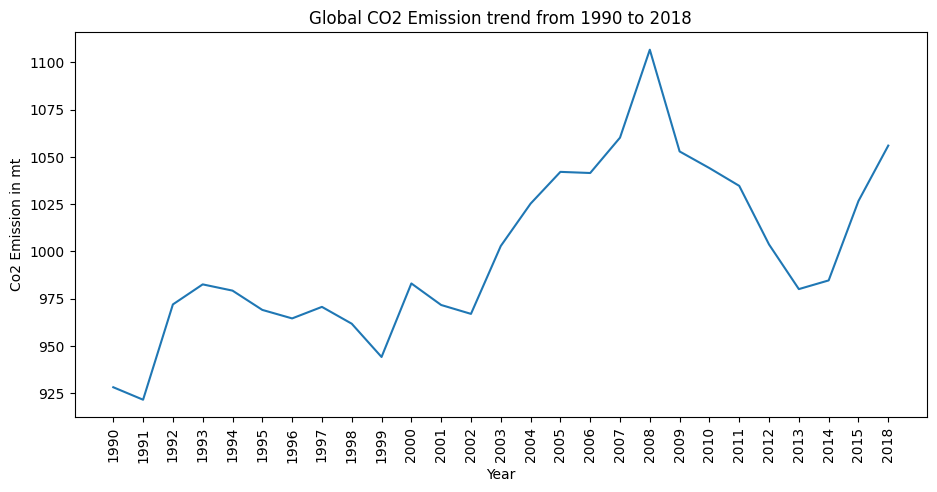

In [ ]:
# Line plot to visualize trend
plt.figure(figsize=(11,5))
sns.lineplot(x=trend.index,y=trend.values)
plt.xticks(rotation=90)
plt.title('Global CO2 Emission trend from 1990 to 2018')
plt.xlabel('Year')
plt.ylabel('Co2 Emission in mt')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Make function to visualize trend of any country
def visualize_country_trend(country=None):
    country=country.title()
    if country==None:
        print('Please give country name')
        return
    fdata=m_data[(m_data['Country'].str.contains(country) & (m_data['Year']!='2021'))]
    if len(fdata) ==0:
        print('Country name not match')
        return
    country=fdata['Country'].unique()[0]
    plt.figure(figsize=(11,5))
    sns.lineplot(data=fdata,x='Year',y='CO2EmissionRate')
    plt.xticks(rotation=90)
    plt.title(f'Global CO2 Emission trend of {country}')
    plt.xlabel('Year')
    plt.ylabel('Co2 Emission in mt')
    plt.show()

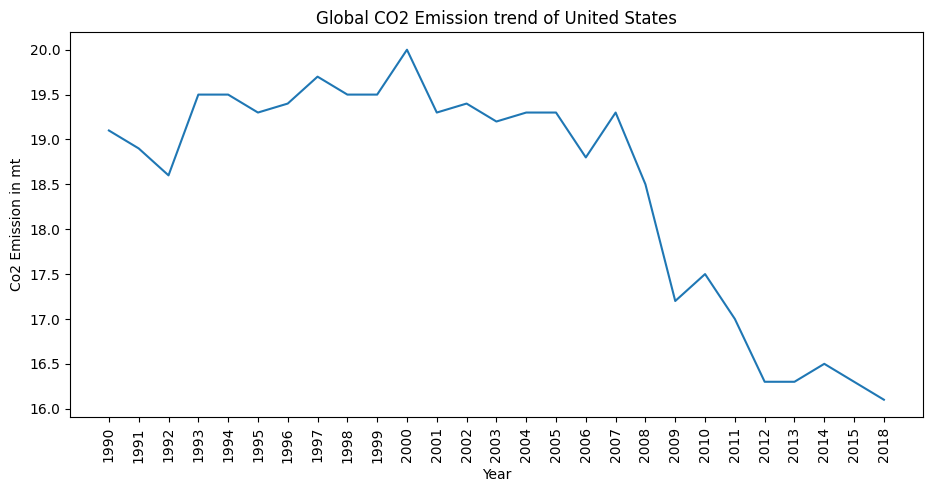

In [ ]:
visualize_country_trend('united states')

In [ ]:
s = m_data.copy()
s['Year'] = pd.to_datetime(s['Year'], format='%Y')
s['CO2EmissionRate'] = pd.to_numeric(s['CO2EmissionRate'], errors='coerce')

trend = (s.groupby('Year', as_index=True)['CO2EmissionRate']
           .sum()[:-1]
           .sort_index())
trend.name = 'Global CO2 Emissions (mt)'

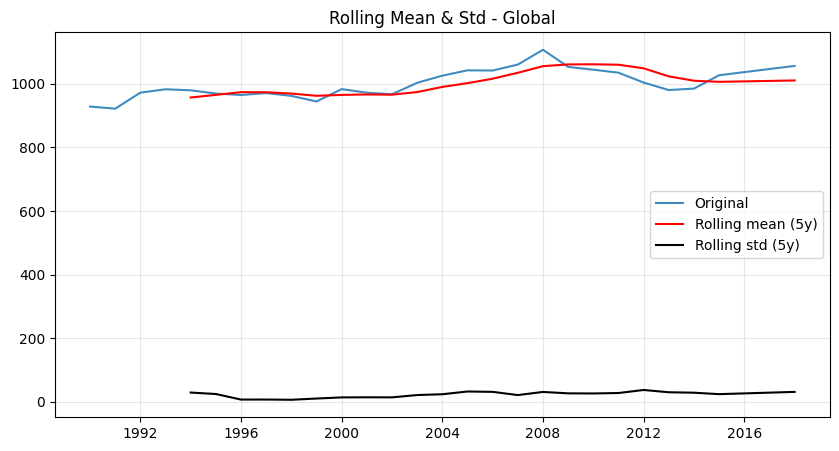

In [ ]:
def plot_rolling(ts, window=5, title_suffix=''):
    rol_mean = ts.rolling(window=window).mean()
    rol_std  = ts.rolling(window=window).std()
    plt.figure(figsize=(10,5))
    plt.plot(ts, label='Original', alpha=0.85)
    plt.plot(rol_mean, label=f'Rolling mean ({window}y)', color='red')
    plt.plot(rol_std, label=f'Rolling std ({window}y)', color='black')
    plt.title(f'Rolling Mean & Std {title_suffix}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_rolling(trend, window=5, title_suffix='- Global')

In [ ]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)

    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
TestStationaryAdfuller(trend)

Test Statistic                 -0.506522
p-value                         0.890737
#Lags Used                      9.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(trend):
    print ('Results of KPSS Test:')
    kpsstest = kpss(trend, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(trend)

Results of KPSS Test:
Test Statistic           0.522516
p-value                  0.036596
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


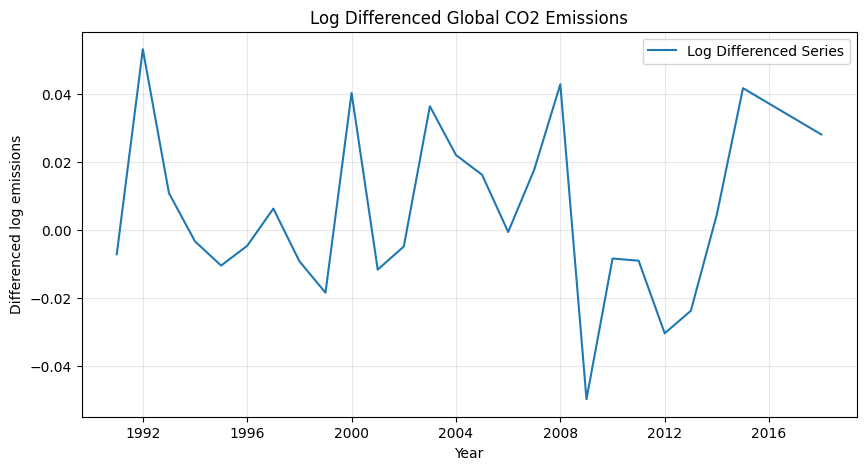

ADF Test after Differencing:
Test Statistic                 -3.354392
p-value                         0.012615
#Lags Used                      8.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

KPSS Test after Differencing:
KPSS  (c) | stat=0.0695, p=0.1000, lags=1
  critical 10%: 0.3470
  critical 5%: 0.4630
  critical 2.5%: 0.5740
  critical 1%: 0.7390


np.float64(0.1)

In [ ]:
# ============================
# Make data stationary
# ============================

# Apply log transform to stabilize variance
ts_log = np.log(trend)

# First order differencing to remove trend
ts_log_diff = ts_log.diff().dropna()

# Plot to visualize
plt.figure(figsize=(10,5))
plt.plot(ts_log_diff, label='Log Differenced Series')
plt.title('Log Differenced Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('Differenced log emissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check stationarity again
print("ADF Test after Differencing:")
TestStationaryAdfuller(ts_log_diff)

print("\nKPSS Test after Differencing:")
kpss_test(ts_log_diff)


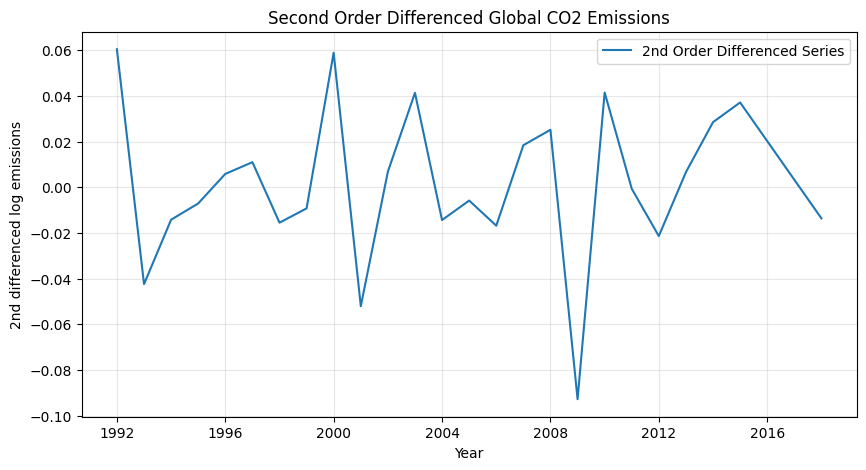

ADF Test after 2nd Differencing:
Test Statistic                 -2.354550
p-value                         0.154977
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 

KPSS Test after 2nd Differencing:
KPSS  (c) | stat=0.2867, p=0.1000, lags=13
  critical 10%: 0.3470
  critical 5%: 0.4630
  critical 2.5%: 0.5740
  critical 1%: 0.7390


np.float64(0.1)

In [ ]:
# ============================
# Second Differencing
# ============================

# Apply second order differencing
ts_log_diff2 = ts_log.diff().diff().dropna()

# Plot the new series
plt.figure(figsize=(10,5))
plt.plot(ts_log_diff2, label='2nd Order Differenced Series')
plt.title('Second Order Differenced Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('2nd differenced log emissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check stationarity again
print("ADF Test after 2nd Differencing:")
TestStationaryAdfuller(ts_log_diff2)

print("\nKPSS Test after 2nd Differencing:")
kpss_test(ts_log_diff2)


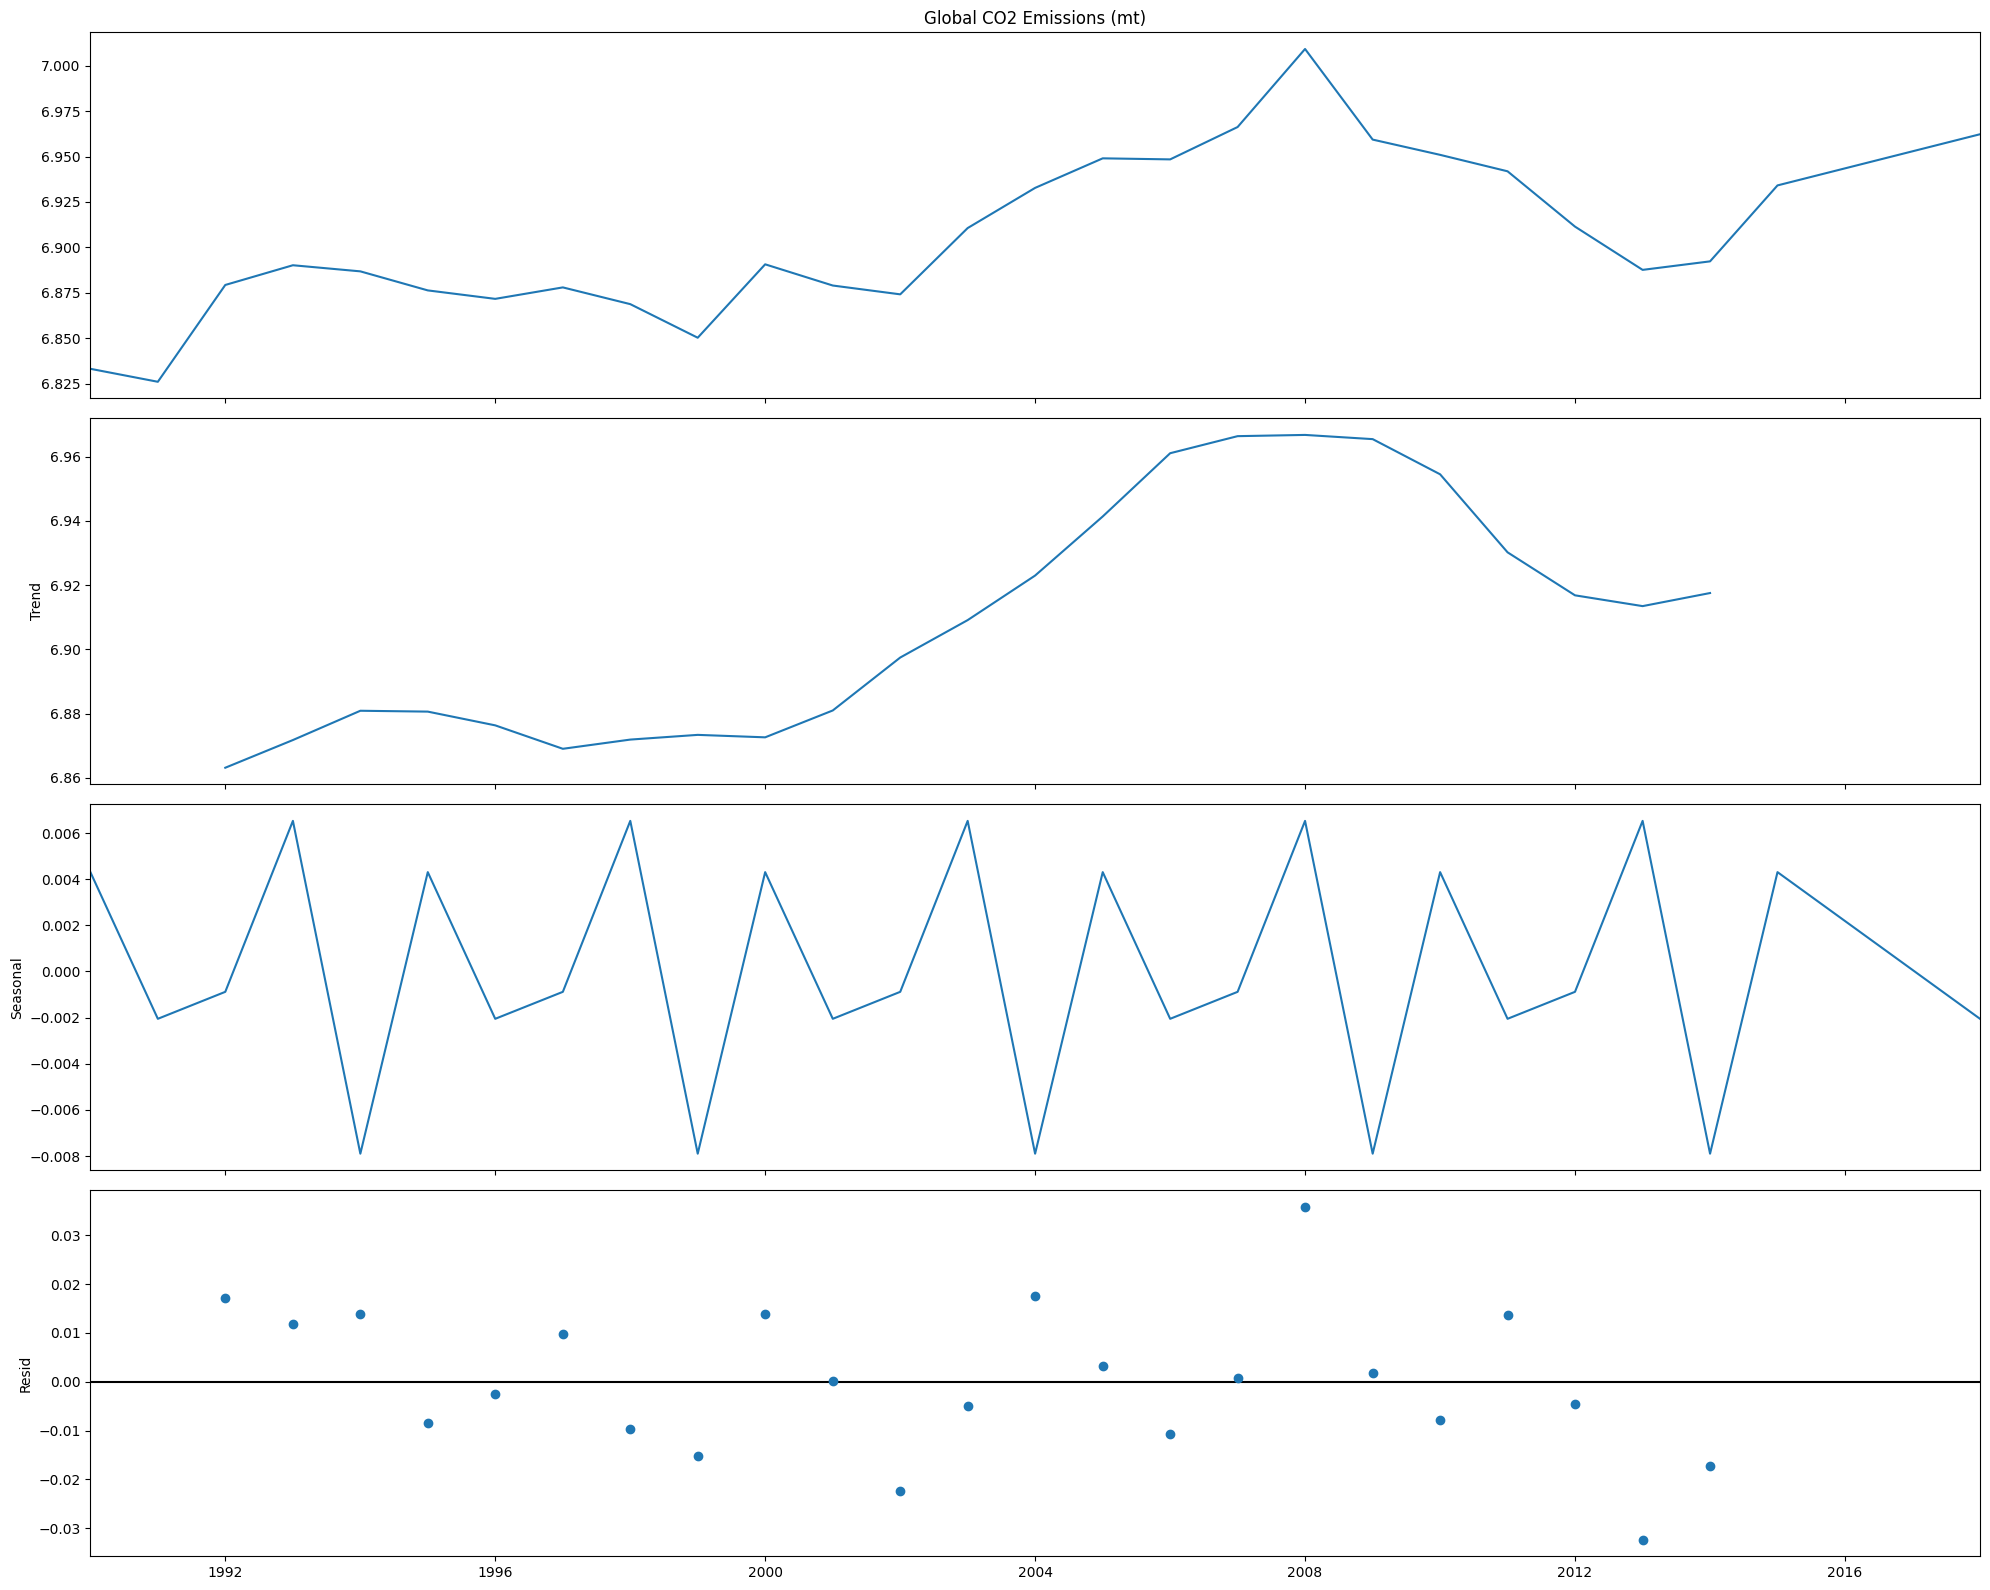

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the logged series (not differenced yet)
decomp = seasonal_decompose(ts_log.dropna(), model='additive', period=5)  # period=5 for 5-year cycles
decomp.plot()
plt.show()


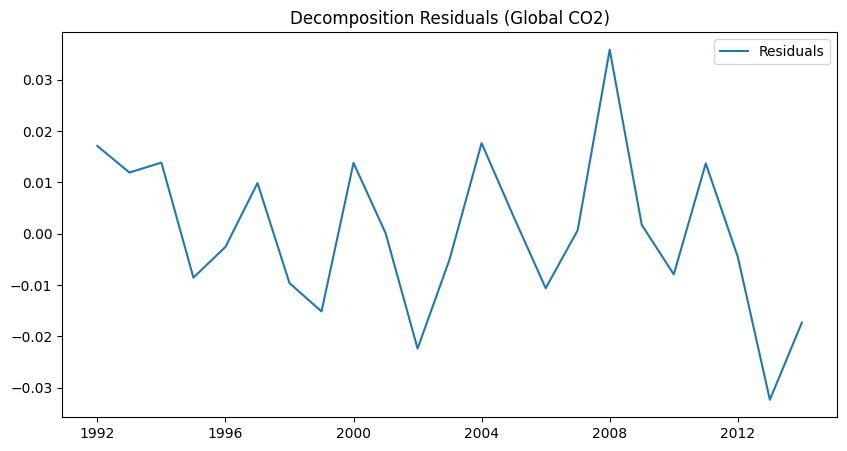

ADF Test on Residuals:
Test Statistic                -7.371004e+00
p-value                        8.972486e-11
#Lags Used                     9.000000e+00
Number of Observations Used    1.300000e+01
Critical Value (1%)           -4.068854e+00
Critical Value (5%)           -3.127149e+00
Critical Value (10%)          -2.701730e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary

KPSS Test on Residuals:
KPSS  (c) | stat=0.2459, p=0.1000, lags=6
  critical 10%: 0.3470
  critical 5%: 0.4630
  critical 2.5%: 0.5740
  critical 1%: 0.7390


np.float64(0.1)

In [ ]:
# Extract residuals from decomposition
residuals = decomp.resid.dropna()

# Plot residuals
plt.figure(figsize=(10,5))
plt.plot(residuals, label='Residuals')
plt.title('Decomposition Residuals (Global CO2)')
plt.legend()
plt.show()

# Stationarity tests on residuals
print("ADF Test on Residuals:")
TestStationaryAdfuller(residuals)

print("\nKPSS Test on Residuals:")
kpss_test(residuals)


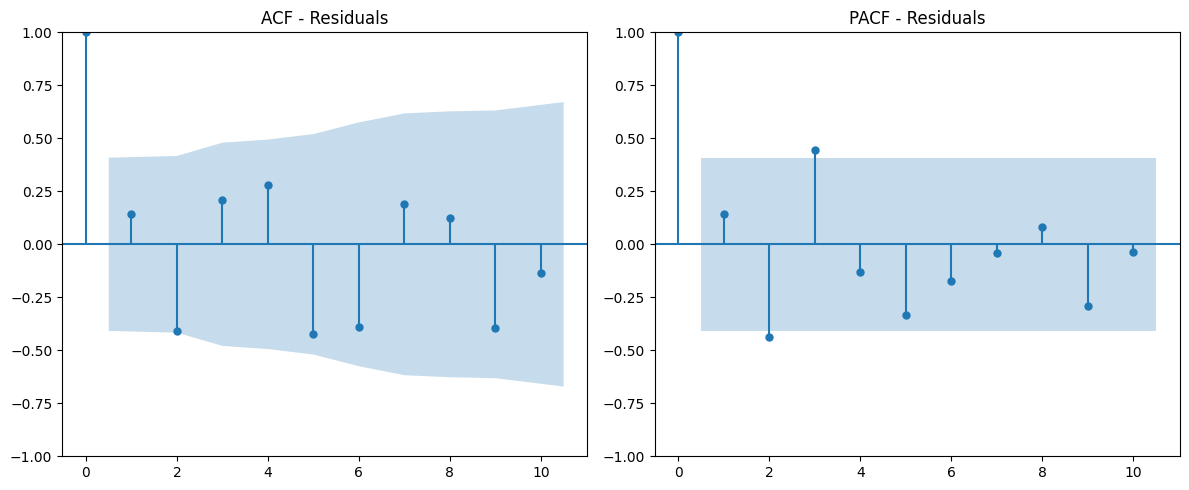

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(residuals, lags=10, ax=plt.gca())
plt.title("ACF - Residuals")

plt.subplot(1,2,2)
plot_pacf(residuals, lags=10, ax=plt.gca())
plt.title("PACF - Residuals")
plt.tight_layout()
plt.show()


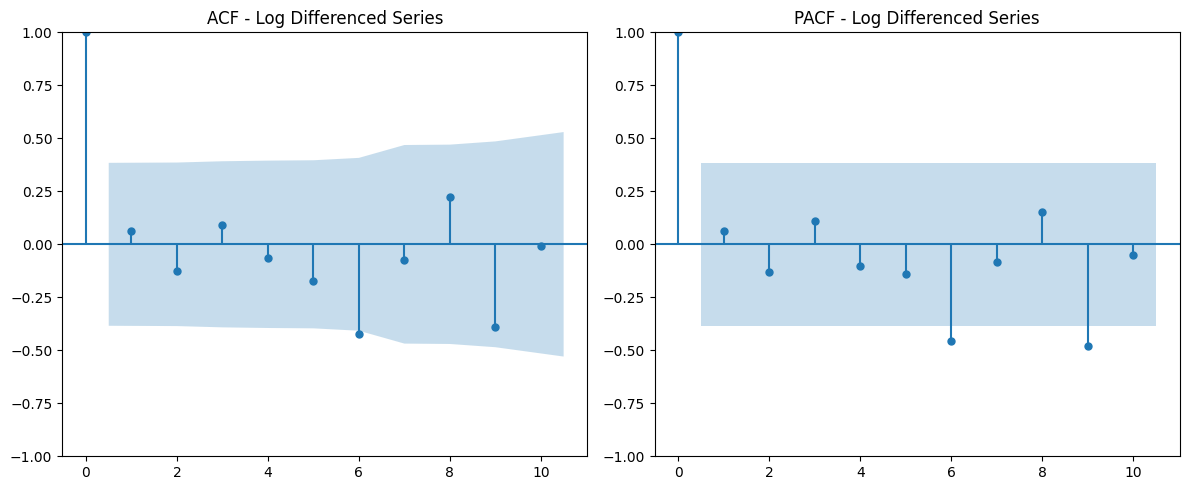

In [ ]:
# ============================
# ACF and PACF for log-differenced global CO2 series
# ============================
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_acf(ts_log_diff.dropna(), lags=10, ax=plt.gca())
plt.title("ACF - Log Differenced Series")

plt.subplot(1,2,2)
plot_pacf(ts_log_diff.dropna(), lags=10, ax=plt.gca())
plt.title("PACF - Log Differenced Series")

plt.tight_layout()
plt.show()


                                   SARIMAX Results                                   
Dep. Variable:     Global CO2 Emissions (mt)   No. Observations:                   27
Model:                        ARIMA(1, 1, 0)   Log Likelihood                  59.070
Date:                       Sat, 23 Aug 2025   AIC                           -114.141
Time:                               07:28:40   BIC                           -111.625
Sample:                                    0   HQIC                          -113.416
                                        - 27                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0937      0.233      0.403      0.687      -0.363       0.550
sigma2         0.0006      0.000      3.088      0.002       0.000       0.

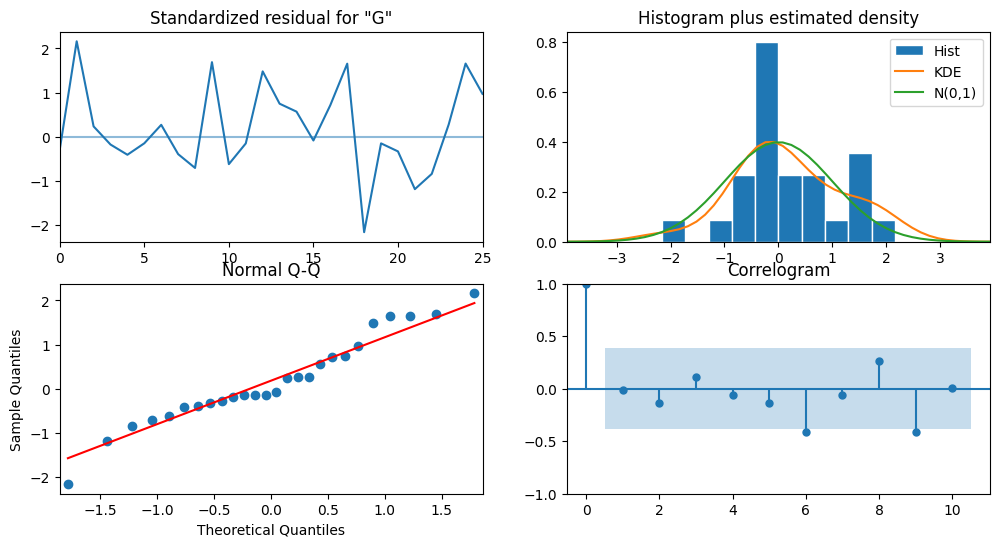

In [ ]:
import statsmodels.api as sm

# Fit ARIMA(1,1,0) on the log series
model = sm.tsa.ARIMA(ts_log, order=(1,1,0))
results = model.fit()

# Model summary
print(results.summary())

# Diagnostic plots
results.plot_diagnostics(figsize=(12,6))
plt.show()


In [ ]:
import statsmodels.api as sm

# Candidate models
orders = [(0,1,0), (1,1,0), (0,1,1), (1,1,1)]

results_dict = {}

for order in orders:
    try:
        model = sm.tsa.ARIMA(ts_log, order=order)
        results = model.fit()
        results_dict[order] = results
        print(f"ARIMA{order} => AIC: {results.aic:.2f}, BIC: {results.bic:.2f}")
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")

# Find best model by AIC
best_order = min(results_dict, key=lambda x: results_dict[x].aic)
best_model = results_dict[best_order]

print("\nBest model by AIC:", best_order)
print(best_model.summary())


ARIMA(0, 1, 0) => AIC: -115.91, BIC: -114.66
ARIMA(1, 1, 0) => AIC: -114.14, BIC: -111.62
ARIMA(0, 1, 1) => AIC: -114.22, BIC: -111.70
ARIMA(1, 1, 1) => AIC: -112.98, BIC: -109.20

Best model by AIC: (0, 1, 0)
                                   SARIMAX Results                                   
Dep. Variable:     Global CO2 Emissions (mt)   No. Observations:                   27
Model:                        ARIMA(0, 1, 0)   Log Likelihood                  58.957
Date:                       Sat, 23 Aug 2025   AIC                           -115.914
Time:                               08:25:04   BIC                           -114.656
Sample:                                    0   HQIC                          -115.551
                                        - 27                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

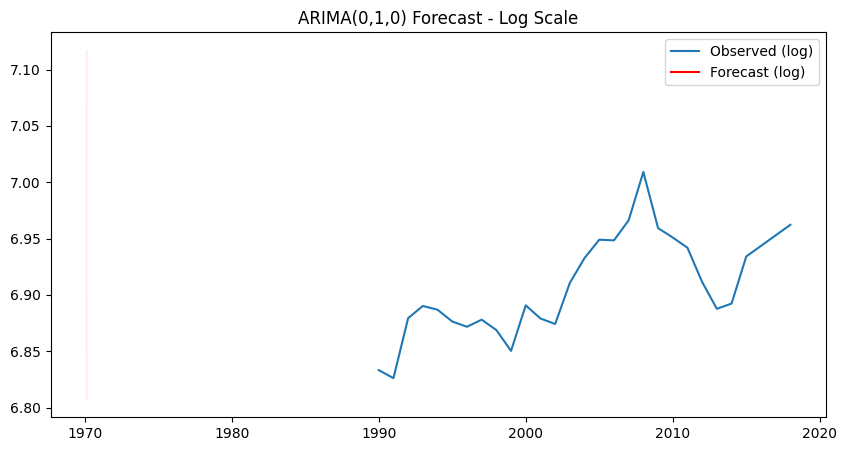

27    1056.0
28    1056.0
29    1056.0
30    1056.0
31    1056.0
32    1056.0
33    1056.0
34    1056.0
35    1056.0
36    1056.0
Name: predicted_mean, dtype: float64


In [ ]:
# Forecast next 10 years
n_forecast = 10
forecast = best_model.get_forecast(steps=n_forecast)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,5))
plt.plot(ts_log, label='Observed (log)')
plt.plot(forecast.predicted_mean, label='Forecast (log)', color='red')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("ARIMA(0,1,0) Forecast - Log Scale")
plt.legend()
plt.show()

# Convert back from log to original scale
forecast_original = np.exp(forecast.predicted_mean)
forecast_original_ci = np.exp(forecast_ci)
print(forecast_original)


                                   SARIMAX Results                                   
Dep. Variable:     Global CO2 Emissions (mt)   No. Observations:                   27
Model:                        ARIMA(0, 1, 0)   Log Likelihood                  59.477
Date:                       Sat, 23 Aug 2025   AIC                           -114.953
Time:                               08:38:56   BIC                           -112.437
Sample:                                    0   HQIC                          -114.229
                                        - 27                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0050      0.005      1.024      0.306      -0.005       0.014
sigma2         0.0006      0.000      3.164      0.002       0.000       0.

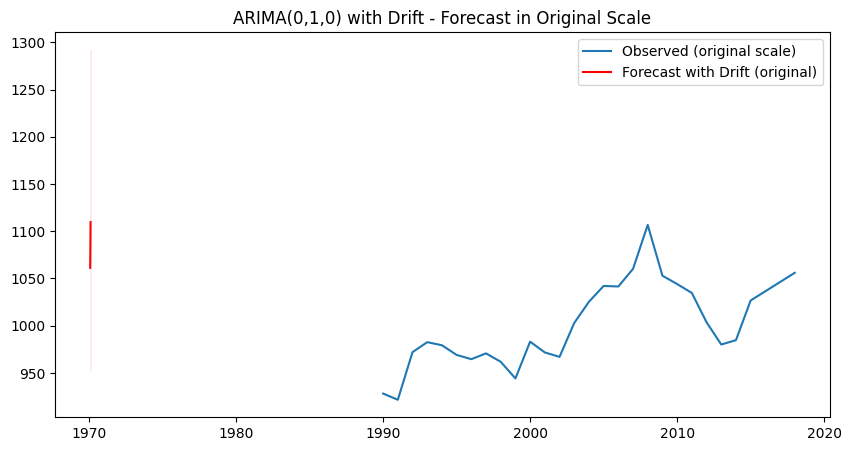

Forecasted values in original scale:
27    1061.246258
28    1066.518579
29    1071.817093
30    1077.141931
31    1082.493223
32    1087.871100
33    1093.275694
34    1098.707139
35    1104.165568
36    1109.651115
Name: predicted_mean, dtype: float64


In [ ]:
# ============================
# ARIMA(0,1,0) with Drift
# ============================

import statsmodels.api as sm

# Fit ARIMA with drift term
model_drift = sm.tsa.ARIMA(ts_log, order=(0,1,0), trend='t')
results_drift = model_drift.fit()

print(results_drift.summary())

# Forecast next 10 years
n_forecast = 10
forecast_drift = results_drift.get_forecast(steps=n_forecast)

# Back-transform from log to normal scale
forecast_original = np.exp(forecast_drift.predicted_mean)
forecast_ci_original = np.exp(forecast_drift.conf_int())

# Plot in original scale
plt.figure(figsize=(10,5))
plt.plot(np.exp(ts_log), label='Observed (original scale)')
plt.plot(forecast_original, label='Forecast with Drift (original)', color='red')
plt.fill_between(forecast_ci_original.index,
                 forecast_ci_original.iloc[:,0],
                 forecast_ci_original.iloc[:,1], color='pink', alpha=0.3)
plt.title("ARIMA(0,1,0) with Drift - Forecast in Original Scale")
plt.legend()
plt.show()

print("Forecasted values in original scale:")
print(forecast_original)



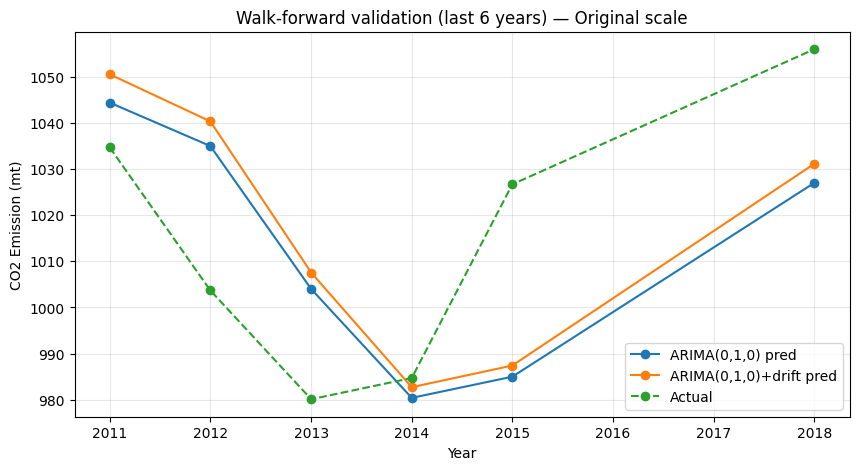

Validation metrics (lower is better):
ARIMA(0,1,0)       | MAE=23.321 | RMSE=26.597 | MAPE=2.29% | sMAPE=2.30%
ARIMA(0,1,0)+drift | MAE=24.351 | RMSE=27.430 | MAPE=2.39% | sMAPE=2.39%


In [ ]:
# ============================
# Walk-forward validation (original scale)
# ============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- config ---
y = trend.dropna().copy()                 # original scale series (Year index)
N_TEST = 6                                # number of years in the test/validation window
orders_to_try = [("ARIMA(0,1,0)", (0,1,0), None),
                 ("ARIMA(0,1,0)+drift", (0,1,0), 't')]   # compare no-drift vs drift

# --- helpers ---
def smape(y_true, y_pred):
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    denom[denom == 0] = 1e-12
    return np.mean(np.abs(y_pred - y_true) / denom) * 100

def rolling_backtest(y, order, trend_term=None, test_len=6):
    """
    Fits ARIMA on log(y) in expanding window.
    Forecasts 1-step ahead each time, back-transforms to original scale with bias correction.
    Returns predictions (aligned to test index) and metrics.
    """
    y_train = y.iloc[:-test_len]
    y_test  = y.iloc[-test_len:]
    preds = []

    # iterative 1-step ahead
    for cutoff in range(len(y_train), len(y)):
        y_expanding = y.iloc[:cutoff]                  # observed up to t-1
        # fit on log scale
        log_series = np.log(y_expanding)
        model = sm.tsa.ARIMA(log_series, order=order, trend=trend_term)
        res = model.fit()

        # 1-step forecast on log scale
        fc = res.get_forecast(steps=1)
        mu = fc.predicted_mean.iloc[0]
        # approximate bias correction using forecast variance of the mean
        # (if var not available, fall back to residual var)
        try:
            var = fc.var_pred_mean.iloc[0]
        except Exception:
            var = res.sigma2

        y_hat = float(np.exp(mu + 0.5*var))           # back to original scale
        preds.append(y_hat)

    preds = pd.Series(preds, index=y_test.index, name="pred")

    # metrics
    e = preds.values - y_test.values
    mae  = np.mean(np.abs(e))
    rmse = np.sqrt(np.mean(e**2))
    mape = np.mean(np.abs(e) / np.maximum(y_test.values, 1e-12)) * 100
    smp  = smape(y_test.values, preds.values)

    metrics = {
        "MAE": mae, "RMSE": rmse, "MAPE%": mape, "sMAPE%": smp
    }
    return y_test, preds, metrics

all_results = []
plt.figure(figsize=(10,5))

for label, order, trend_term in orders_to_try:
    y_test, preds, metrics = rolling_backtest(y, order, trend_term, test_len=N_TEST)
    all_results.append((label, metrics))
    plt.plot(preds.index, preds.values, marker='o', label=f"{label} pred")

# Plot actuals
plt.plot(y.index[-N_TEST:], y.values[-N_TEST:], marker='o', linestyle='--', label="Actual")
plt.title(f"Walk-forward validation (last {N_TEST} years) — Original scale")
plt.xlabel("Year"); plt.ylabel("CO2 Emission (mt)")
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

# Print metrics nicely
print("Validation metrics (lower is better):")
for label, m in all_results:
    print(f"{label:18s} | MAE={m['MAE']:.3f} | RMSE={m['RMSE']:.3f} | MAPE={m['MAPE%']:.2f}% | sMAPE={m['sMAPE%']:.2f}%")


In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Fit final ARIMA(0,1,0) on log-transformed series
final_model = sm.tsa.ARIMA(ts_log, order=(0,1,0))
final_results = final_model.fit()

print(final_results.summary())


                                   SARIMAX Results                                   
Dep. Variable:     Global CO2 Emissions (mt)   No. Observations:                   27
Model:                        ARIMA(0, 1, 0)   Log Likelihood                  58.957
Date:                       Sat, 23 Aug 2025   AIC                           -115.914
Time:                               08:53:42   BIC                           -114.656
Sample:                                    0   HQIC                          -115.551
                                        - 27                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0006      0.000      3.303      0.001       0.000       0.001
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             

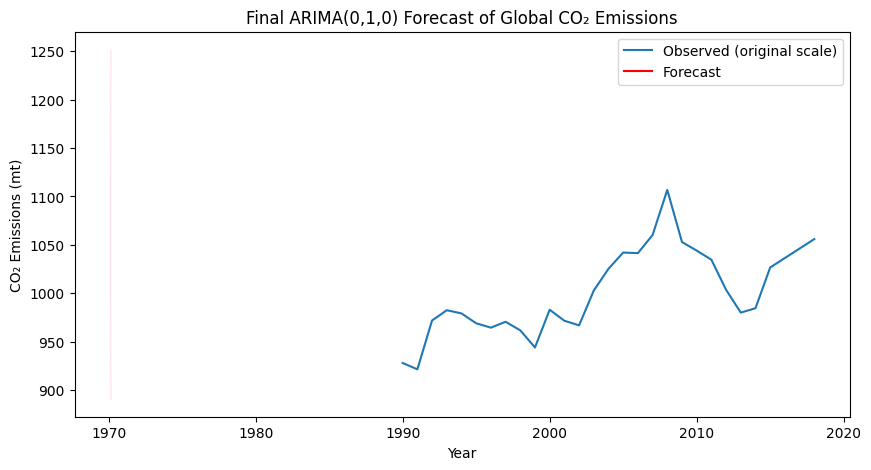

Forecasted values in original scale:
27    1056.0
28    1056.0
29    1056.0
30    1056.0
31    1056.0
32    1056.0
33    1056.0
34    1056.0
35    1056.0
36    1056.0
37    1056.0
38    1056.0
Name: predicted_mean, dtype: float64


In [ ]:
# Forecast up to 2030 (last year in data = 2018, so 12 steps ahead)
n_forecast = 12
forecast = final_results.get_forecast(steps=n_forecast)
forecast_ci = forecast.conf_int()

# Back-transform (log → original)
forecast_original = np.exp(forecast.predicted_mean)
forecast_ci_original = np.exp(forecast_ci)

# Plot
plt.figure(figsize=(10,5))
plt.plot(np.exp(ts_log), label="Observed (original scale)")
plt.plot(forecast_original, label="Forecast", color="red")
plt.fill_between(forecast_ci_original.index,
                 forecast_ci_original.iloc[:,0],
                 forecast_ci_original.iloc[:,1], color="pink", alpha=0.3)
plt.title("Final ARIMA(0,1,0) Forecast of Global CO₂ Emissions")
plt.xlabel("Year"); plt.ylabel("CO₂ Emissions (mt)")
plt.legend(); plt.show()

print("Forecasted values in original scale:")
print(forecast_original)


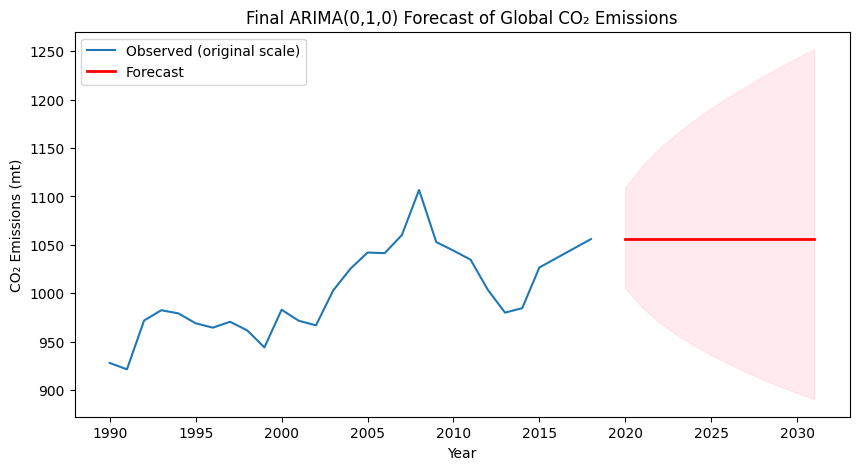

In [ ]:
# Original years (from your trend series)
last_year = ts_log.index[-1].year   # should be 2018
forecast_years = pd.date_range(start=f"{last_year+1}", periods=n_forecast, freq="Y")

# Replace forecast index
forecast_original.index = forecast_years
forecast_ci_original.index = forecast_years

# Plot
plt.figure(figsize=(10,5))
plt.plot(np.exp(ts_log), label="Observed (original scale)")
plt.plot(forecast_original, label="Forecast", color="red", linewidth=2)
plt.fill_between(forecast_ci_original.index,
                 forecast_ci_original.iloc[:,0],
                 forecast_ci_original.iloc[:,1], color="pink", alpha=0.3)
plt.title("Final ARIMA(0,1,0) Forecast of Global CO₂ Emissions")
plt.xlabel("Year"); plt.ylabel("CO₂ Emissions (mt)")
plt.legend(); plt.show()


MODEL USING RESIDUAL

In [ ]:
import statsmodels.api as sm
import pandas as pd
from itertools import product

# Define search range for p and q
p_range = range(0, 4)   # try 0,1,2,3
q_range = range(0, 4)

results_list = []

for p, q in product(p_range, q_range):
    try:
        model = sm.tsa.ARIMA(residuals, order=(p,0,q))  # d=0 since residuals are stationary
        fit_res = model.fit()
        results_list.append((p, q, fit_res.aic, fit_res.bic))
    except Exception as e:
        continue

# Convert to DataFrame
results_df = pd.DataFrame(results_list, columns=["p","q","AIC","BIC"])
results_df = results_df.sort_values(by="AIC").reset_index(drop=True)

print("Grid search results (sorted by AIC):")
print(results_df)

best_row = results_df.iloc[0]
print(f"\nBest ARMA order by AIC: ({best_row.p}, {best_row.q}) "
      f"with AIC={best_row.AIC:.2f}, BIC={best_row.BIC:.2f}")


Grid search results (sorted by AIC):
    p  q         AIC         BIC
0   3  0 -129.457347 -123.779876
1   0  3 -129.324231 -123.646760
2   2  3 -128.977296 -121.028836
3   1  3 -127.694816 -120.881851
4   3  1 -127.586481 -120.773516
5   2  1 -127.543003 -121.865532
6   1  2 -127.359587 -121.682116
7   2  0 -126.582309 -122.040332
8   0  2 -126.334253 -121.792276
9   0  1 -125.976903 -122.570421
10  1  1 -124.887942 -120.345965
11  2  2 -124.329383 -117.516418
12  0  0 -123.898554 -121.627566
13  3  2 -123.837258 -115.888798
14  3  3 -123.156380 -114.072427
15  1  0 -122.402821 -118.996339

Best ARMA order by AIC: (3.0, 0.0) with AIC=-129.46, BIC=-123.78


                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                   23
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  69.729
Date:                Sat, 23 Aug 2025   AIC                           -129.457
Time:                        09:41:27   BIC                           -123.780
Sample:                    01-01-1992   HQIC                          -128.029
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.005      0.097      0.923      -0.009       0.009
ar.L1          0.4582      0.187      2.446      0.014       0.091       0.825
ar.L2         -0.5234      0.199     -2.636      0.0

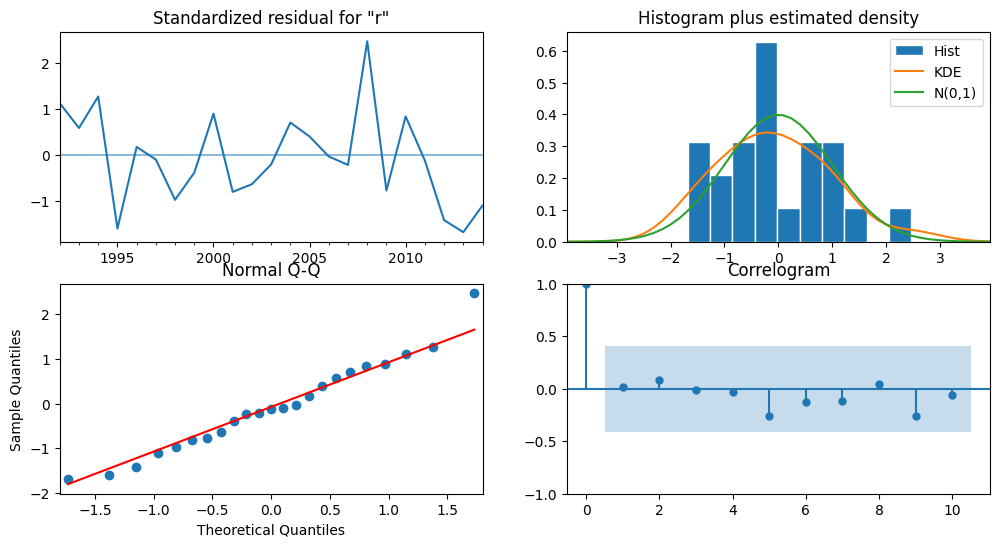

In [ ]:
model = sm.tsa.ARIMA(residuals, order=(3,0,0))
results = model.fit()

print(results.summary())
results.plot_diagnostics(figsize=(12,6))
plt.show()


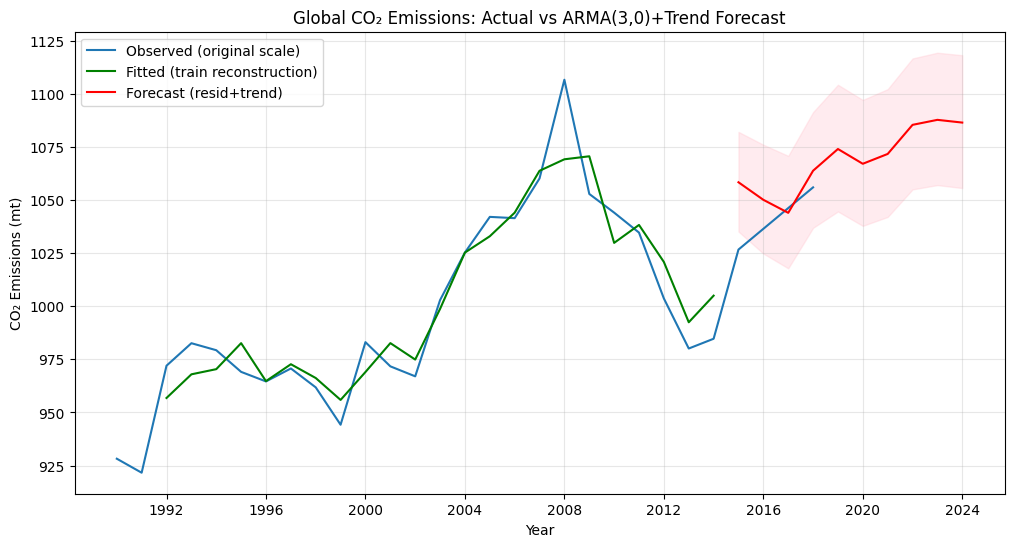

Forecast (original scale):
            Forecast (original mt)  Lower CI  Upper CI
2015-01-01                 1058.41   1035.19   1082.14
2016-01-01                 1050.15   1024.84   1076.08
2017-01-01                 1044.01   1017.86   1070.83
2018-01-01                 1063.84   1036.94   1091.43
2019-01-01                 1074.07   1044.65   1104.32
2020-01-01                 1067.11   1037.87   1097.17
2021-01-01                 1071.74   1042.07   1102.26
2022-01-01                 1085.45   1055.05   1116.72
2023-01-01                 1087.80   1057.08   1119.42
2024-01-01                 1086.51   1055.69   1118.24


In [ ]:
# ============================================
# Compare actual emissions vs ARMA(3,0)+Trend forecasts
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# --- In-sample fitted residuals ---
pred_resid = results.get_prediction()
pred_resid_ci = pred_resid.conf_int()

# Fitted residuals
fitted_resid = pred_resid.predicted_mean

# --- Forecast future residuals ---
n_steps = 10   # forecast horizon (years ahead)
res_forecast = results.get_forecast(steps=n_steps)
res_fc_mean = res_forecast.predicted_mean
res_fc_ci = res_forecast.conf_int()

# --- Trend extrapolation (linear OLS on log-trend) ---
trend_series = decomp.trend.dropna()
t_idx = np.arange(len(trend_series))
X = sm.add_constant(t_idx)
ols = sm.OLS(trend_series.values, X).fit()

# Extend trend into the future
t_future = np.arange(len(trend_series), len(trend_series) + n_steps)
Xf = sm.add_constant(t_future)
trend_fc = pd.Series(ols.predict(Xf), index=res_fc_mean.index, name="trend_forecast")

# --- Combine fitted values (log scale) ---
log_fitted = trend_series.loc[fitted_resid.index] + fitted_resid
log_forecast = trend_fc + res_fc_mean

# --- Back-transform to original scale ---
y_fitted = np.exp(log_fitted)
y_forecast = np.exp(log_forecast)

# Original series (full log and original)
y_actual = np.exp(ts_log.dropna())

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(y_actual, label="Observed (original scale)")
plt.plot(y_fitted, label="Fitted (train reconstruction)", color="green")
plt.plot(y_forecast, label="Forecast (resid+trend)", color="red")

# Confidence intervals (original scale)
ci_lower = np.exp(trend_fc + res_fc_ci.iloc[:,0])
ci_upper = np.exp(trend_fc + res_fc_ci.iloc[:,1])
plt.fill_between(y_forecast.index, ci_lower, ci_upper,
                 color="pink", alpha=0.3)

plt.title("Global CO₂ Emissions: Actual vs ARMA(3,0)+Trend Forecast")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (mt)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Forecast table ---
fc_table = pd.DataFrame({
    "Forecast (original mt)": y_forecast.round(2),
    "Lower CI": ci_lower.round(2),
    "Upper CI": ci_upper.round(2)
})
print("Forecast (original scale):")
print(fc_table)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Align actual vs fitted (only overlapping years)
y_true = y_actual.loc[log_fitted.index]
y_pred = y_fitted.loc[log_fitted.index]

# Error metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = (np.abs((y_true - y_pred) / y_true).mean()) * 100
smape = (np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))) * 100

print("Validation metrics (in original scale):")
print(f"MAE  = {mae:.3f}")
print(f"MSE  = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAPE = {mape:.2f}%")
print(f"sMAPE= {smape:.2f}%")


Validation metrics (in original scale):
MAE  = 10.688
MSE  = 181.034
RMSE = 13.455
MAPE = 1.06%
sMAPE= 1.06%
